# iris data 분석

## 데이터 불러오기
pandas dataframe으로 iris 데이터를 불러온다.

In [1]:
from sklearn.datasets import load_iris # scikit-learn의 샘플 데이터 로드를 위해 import
import pandas as pd # 데이터 프레임으로 변환을 위해 임포트
import numpy as np # 고수학 연산을 위해 임포트

iris = load_iris() # sample data load

# np.c_ is the numpy concatenate function
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

# 0.0, 1.0, 2.0으로 표현된 label을 문자열로 매핑
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

## 데이터 둘러보기
상위 10개 샘플의 데이터를 출력한다 

In [2]:
df.head(n=10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


target에 대한 샘플 갯수를 출력한다

In [3]:
df["target"].value_counts()

virginica     50
setosa        50
versicolor    50
Name: target, dtype: int64

## 데이터 시각화 분석
target 별로 sepal length (cm)에 대한 boxplot, stripplot을 그린다.

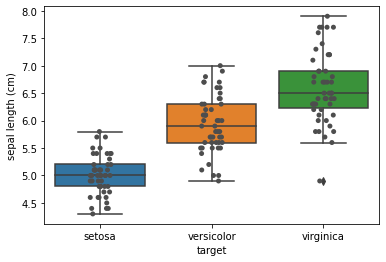

In [4]:
# 시각화를 위한 패키지 임포트
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x="target", y="sepal length (cm)", data=df)
sns.stripplot(x="target", y="sepal length (cm)", data=df, jitter=True, color=".3")
plt.show()

target 별로 sepal width (cm)에 대한 boxplot, stripplot을 그린다.

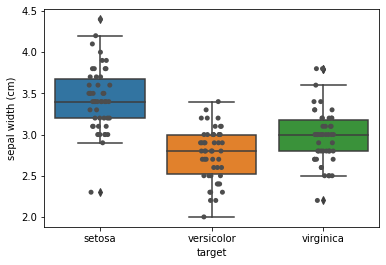

In [5]:
sns.boxplot(x="target", y="sepal width (cm)", data=df)
sns.stripplot(x="target", y="sepal width (cm)", data=df, jitter=True, color=".3")
plt.show()

target 별로 petal length (cm)에 대한 boxplot, stripplot을 그린다.

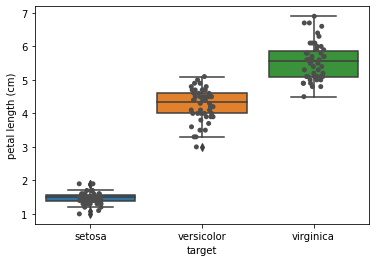

In [6]:
sns.boxplot(x="target", y="petal length (cm)", data=df)
sns.stripplot(x="target", y="petal length (cm)", data=df, jitter=True, color=".3")
plt.show()

target 별로 petal width (cm)에 대한 boxplot, stripplot을 그린다.

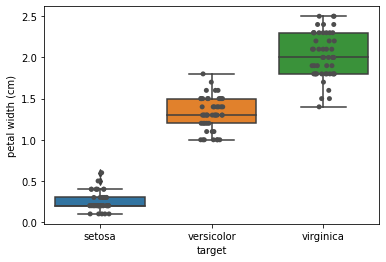

In [7]:
sns.boxplot(x="target", y="petal width (cm)", data=df)
sns.stripplot(x="target", y="petal width (cm)", data=df, jitter=True, color=".3")
plt.show()

## 머신러닝 데이터 나누기
데이터를 train dataset, test dataset으로 4:1 비율로 나눈다

In [8]:
train_idx = [i for i in range(len(df)) if i % 5 != 4]
test_idx = [i for i in range(len(df)) if i % 5 == 4]
x_train = df.iloc[train_idx, :-1]
y_train = df.iloc[train_idx, -1]
x_test = df.iloc[test_idx, :-1]
y_test = df.iloc[test_idx, -1]

print(y_train.value_counts())
print(y_test.value_counts())

virginica     40
setosa        40
versicolor    40
Name: target, dtype: int64
virginica     10
setosa        10
versicolor    10
Name: target, dtype: int64


## 머신러닝 분석
1) 모델을 생성하고

2) 모델을 학습하고 (fit함수)

3) 모델로 예측하고 (predict 함수)

4) 모델을 평가한다 (accuracy_score 함수)

In [9]:
from sklearn.metrics import accuracy_score

# 1. Logistic regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("Logistic Regression:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

Logistic Regression: 0.9666666666666667 0.9666666666666667


In [10]:
# 2. Decision tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("Decision tree:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

Decision tree: 1.0 0.9333333333333333


In [11]:
# 3. Support vector machine
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("Support vector machine:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

Support vector machine: 0.9583333333333334 0.9666666666666667


In [12]:
# 4. Gaussian naive bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("Gaussian naive bayes:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

Gaussian naive bayes: 0.9666666666666667 0.9333333333333333


In [13]:
# 5. K nearest neighbor
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("K nearest neighbor:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

K nearest neighbor: 0.975 0.9666666666666667


In [14]:
# 6. Random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("Random forest:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

Random forest: 1.0 0.9


In [15]:
# 7. Gradient boosing
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("Gradient boosing:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

Gradient boosing: 1.0 0.9


In [16]:
# 8. Neural network
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=1000)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print("Neural network:", accuracy_score(y_train, y_pred_train), accuracy_score(y_test, y_pred_test))

Neural network: 0.975 1.0
